In [33]:
import os
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt

In [34]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [35]:
data_model = "model"
dataset_dir = "dataset"

data_dir = pathlib.Path(dataset_dir)

batch_size = 32
size = 180

In [36]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(size, size),
    batch_size=batch_size
)

Found 60 files belonging to 3 classes.
Using 48 files for training.


In [37]:
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(size, size),
    batch_size=batch_size
)

Found 60 files belonging to 3 classes.
Using 12 files for validation.


In [38]:
class_names = train_dataset.class_names

AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.cache().prefetch(buffer_size=AUTOTUNE)

normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

normalized_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_dataset))
first_image = image_batch[0]

num_classes = len(class_names)
print(class_names)

['.ipynb_checkpoints', 'mawar', 'sunflower']


In [39]:
model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(size, size, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)    
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_6 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 45, 45, 64)       

In [40]:
epochs = 10

history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=epochs
)


Epoch 1/10
2/2 [==============================] - 2s 1s/step - loss: 0.8019 - accuracy: 0.4583 - val_loss: 3.1110 - val_accuracy: 0.4167
Epoch 2/10
2/2 [==============================] - 2s 1s/step - loss: 0.9817 - accuracy: 0.7292 - val_loss: 0.6981 - val_accuracy: 0.5833
Epoch 3/10
2/2 [==============================] - 1s 576ms/step - loss: 0.6067 - accuracy: 0.6458 - val_loss: 0.8953 - val_accuracy: 0.4167
Epoch 4/10
2/2 [==============================] - 2s 583ms/step - loss: 0.3997 - accuracy: 0.7708 - val_loss: 0.2338 - val_accuracy: 1.0000
Epoch 5/10
2/2 [==============================] - 2s 1s/step - loss: 0.1429 - accuracy: 0.9792 - val_loss: 0.1474 - val_accuracy: 0.9167
Epoch 6/10
2/2 [==============================] - 1s 1s/step - loss: 0.0880 - accuracy: 1.0000 - val_loss: 0.1144 - val_accuracy: 0.9167
Epoch 7/10
2/2 [==============================] - 2s 1s/step - loss: 0.0447 - accuracy: 1.0000 - val_loss: 0.1579 - val_accuracy: 0.9167
Epoch 8/10
2/2 [===================

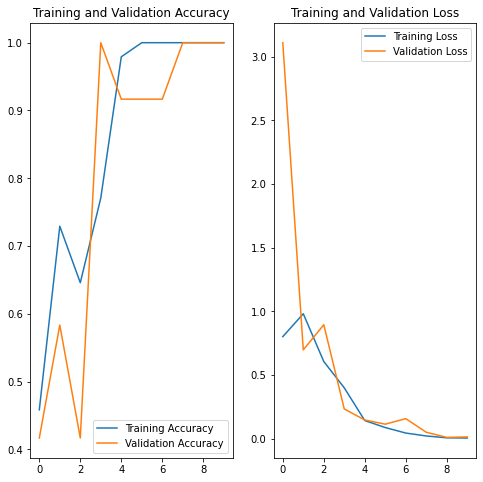

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#Grafik training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [42]:
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal",
                                                    input_shape = (size, 
                                                                  size, 
                                                                  3)),
        layers.experimental.preprocessing.RandomRotation(0.1),
        layers.experimental.preprocessing.RandomZoom(0.1),
    ]
)


In [43]:
model = Sequential([
    data_augmentation,
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [44]:
model.summary()

epochs = 15
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=epochs
)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_7 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                 

Text(0.5, 1.0, 'Training and Validation Loss')

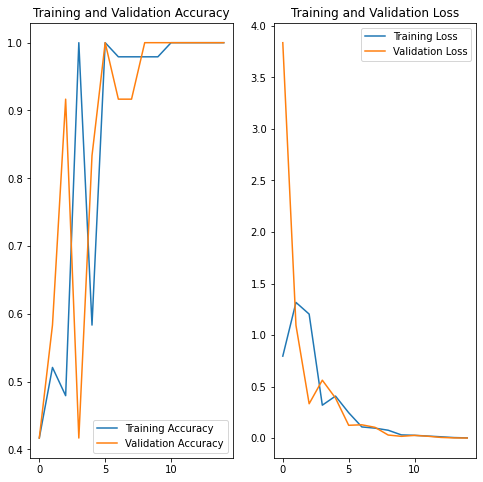

In [52]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#Grafik training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
# plt.show()

In [46]:
if not os.path.exists(data_model):
  os.makedirs(data_model)

model.save(data_model, overwrite=True)
print("Done, model save to /model")


INFO:tensorflow:Assets written to: model/assets
Done, model save to /model


In [47]:
import numpy as np

In [48]:
data_model = "model"

batch_size = 32
size = 180

class_names = class_names

In [49]:
num_classes = len(class_names)
print(class_names)

['.ipynb_checkpoints', 'mawar', 'sunflower']


In [53]:
model = keras.models.load_model(data_model)

img_pred_dir = 'predictions/tuli.jpg'

img_pred = keras.preprocessing.image.load_img(
    img_pred_dir, target_size=(size, size)
)

img_pred_array = keras.preprocessing.image.img_to_array(img_pred)
img_pred_array = tf.expand_dims(img_pred_array, 0)

prediction = model.predict(img_pred_array)
score = tf.nn.softmax(prediction[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to mawar with a 100.00 percent confidence.
